In [142]:
#Install packages:
import numpy as np
import matplotlib as plt
import pandas as pd

import requests
import math
import csv

In [143]:
#open the screened results in a dataframe:
df = pd.read_csv('../thesis/results_screened.csv')

In [144]:
df

,"Exclude (0=include, 1=exclude, 2 = duplicate)",Unnamed: 1,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,1,1270,https://openalex.org/W2583318110,https://doi.org/10.1016/j.annemergmed.2006.07.608,154,154,2006,2006-10-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1,1,1344,https://openalex.org/W2313269542,https://doi.org/10.1097/01.ccm.0000439379.6635...,232,232,2013,2013-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
2,1,1345,https://openalex.org/W2329725391,https://doi.org/10.1097/01.ccm.0000439813.1346...,572,572,2013,2013-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
3,1,1373,https://openalex.org/W2321636823,https://doi.org/10.1097/01.ccm.0000474508.3889...,680,680,2015,2015-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,1,1358,https://openalex.org/W2323150187,https://doi.org/10.1097/01.ccm.0000458340.6832...,843,843,2014,2014-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...
1447,1,507,https://openalex.org/W2018742759,https://doi.org/10.1007/s00134-012-2467-6,Year in review in Intensive Care Medicine 2011...,Year in review in Intensive Care Medicine 2011...,2012,2012-01-20,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1448,0,1147,https://openalex.org/W2012301875,https://doi.org/10.1111/j.1440-1843.2009.01702.x,"Year-in-review 2009: Asthma, COPD and airway b...","Year-in-review 2009: Asthma, COPD and airway b...",2010,2010-02-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1449,1,915,https://openalex.org/W2891570212,https://doi.org/10.1002/ccr3.1671,Youngest presenting patient with dystonia 24 a...,Youngest presenting patient with dystonia 24 a...,2018,2018-09-15,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1450,1,166,https://openalex.org/W1524863043,https://doi.org/10.1023/a:1007383914444,NaN,NaN,1997,1997-08-02,journal-article,"[{'author_position': 'first', 'author': {'id':..."


In [145]:
df.rename(columns = {'Exclude (0=include, 1=exclude, 2 = duplicate)':'screening', 'Unnamed: 1': 'index'}, inplace = True)

In [146]:
df

,screening,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
0,1,1270,https://openalex.org/W2583318110,https://doi.org/10.1016/j.annemergmed.2006.07.608,154,154,2006,2006-10-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1,1,1344,https://openalex.org/W2313269542,https://doi.org/10.1097/01.ccm.0000439379.6635...,232,232,2013,2013-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
2,1,1345,https://openalex.org/W2329725391,https://doi.org/10.1097/01.ccm.0000439813.1346...,572,572,2013,2013-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
3,1,1373,https://openalex.org/W2321636823,https://doi.org/10.1097/01.ccm.0000474508.3889...,680,680,2015,2015-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
4,1,1358,https://openalex.org/W2323150187,https://doi.org/10.1097/01.ccm.0000458340.6832...,843,843,2014,2014-12-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
...,...,...,...,...,...,...,...,...,...,...
1447,1,507,https://openalex.org/W2018742759,https://doi.org/10.1007/s00134-012-2467-6,Year in review in Intensive Care Medicine 2011...,Year in review in Intensive Care Medicine 2011...,2012,2012-01-20,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1448,0,1147,https://openalex.org/W2012301875,https://doi.org/10.1111/j.1440-1843.2009.01702.x,"Year-in-review 2009: Asthma, COPD and airway b...","Year-in-review 2009: Asthma, COPD and airway b...",2010,2010-02-01,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1449,1,915,https://openalex.org/W2891570212,https://doi.org/10.1002/ccr3.1671,Youngest presenting patient with dystonia 24 a...,Youngest presenting patient with dystonia 24 a...,2018,2018-09-15,journal-article,"[{'author_position': 'first', 'author': {'id':..."
1450,1,166,https://openalex.org/W1524863043,https://doi.org/10.1023/a:1007383914444,NaN,NaN,1997,1997-08-02,journal-article,"[{'author_position': 'first', 'author': {'id':..."


In [147]:
#count number of included, duplicates and excluded:
df_exclude = df.groupby(['screening']).count()

In [148]:
df_exclude

,index,id,doi,title,display_name,publication_year,publication_date,type,authorships
screening,,,,,,,,,
0,370,370,370,370,370,370,370,370,370
1,1065,1065,1065,1063,1063,1065,1065,1065,1065
2,17,17,17,17,17,17,17,17,17


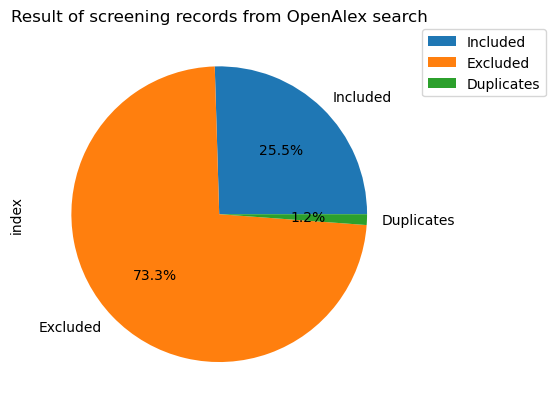

In [149]:
labels = ['Included', 'Excluded', 'Duplicates']
plot = df_exclude.plot.pie(y='index', title="Result of screening records from OpenAlex search", labels=labels,
                   autopct='%1.1f%%')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='screening'>

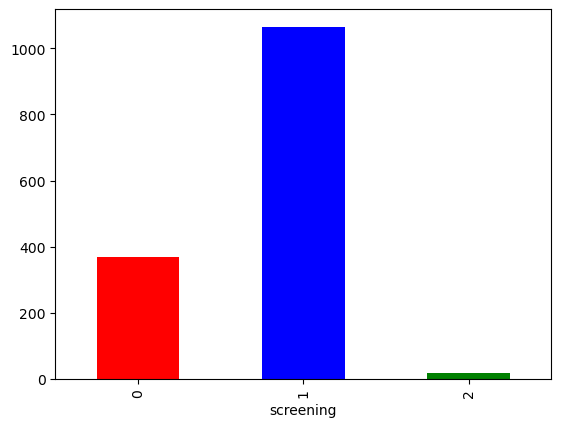

In [150]:
labels = ['Included', 'Excluded', 'Duplicates']
df_exclude.plot.bar(y='index', legend=False, color=['red','blue','green'])

In [151]:
#drop duplicates (Exclude=2):
df = df[df.screening != 2]

In [152]:
#exclude non-relevant results:
df=df[df.screening !=1]